In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud Plots
from wordcloud import WordCloud, STOPWORDS

# Text Clean-up
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aakashrathod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
df_raw = pd.read_excel('US-Economic-News.xlsx')
df = df_raw.copy()
df 

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,2015-12-05 17:48:00,3.0,0.6400,yes,0.6400,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,2015-12-05 16:54:00,NaN,NaN,no,1.0000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,2015-12-05 01:59:00,NaN,NaN,no,1.0000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,2015-12-05 02:19:00,NaN,0.0000,no,0.6750,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,2015-12-05 17:48:00,3.0,0.3257,yes,0.6400,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,830985632,False,finalized,3,2015-11-17 18:16:00,7.0,0.3511,yes,0.6641,wapo_152454634,1952-02-11,"Sawyer Sees Strong Economy For 2 Years, Truce ...",NaN,NaN,Secretary of Commerce Charles W. Sawyer said y...
7996,830985633,False,finalized,3,2015-11-18 08:10:00,NaN,NaN,no,1.0000,wapo_410349039,2009-12-13,Oil's losses are airlines' gains,NaN,NaN,"U.S. stocks inched up last week, overcoming co..."
7997,830985634,False,finalized,3,2015-11-18 12:12:00,NaN,NaN,no,1.0000,wapo_410346237,2009-12-18,Full Senate to vote on Bernanke; PANEL ADVANCE...,NaN,NaN,Ben S. Bernanke cleared a key hurdle Thursday ...
7998,830985635,False,finalized,3,2015-11-18 07:17:00,NaN,0.0000,no,0.6855,wapo_307808606,1995-01-10,Reinventing Opportunities,NaN,NaN,The White House's push to contract out many fe...


In [67]:
df.relevance.value_counts()

relevance
no          6571
yes         1420
not sure       9
Name: count, dtype: int64

In [68]:
df = df[df.relevance!= 'not sure']
df.relevance = df.relevance.map(lambda x: 1 if x == 'yes' else 0)
print(df.relevance.value_counts())
df.head()

relevance
0    6571
1    1420
Name: count, dtype: int64


/var/folders/mn/89jgthfx1f7b2mlbmf36w11c0000gn/T/ipykernel_33723/25579633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevance = df.relevance.map(lambda x: 1 if x == 'yes' else 0)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,2015-12-05 17:48:00,3.0,0.6400,1,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,2015-12-05 16:54:00,NaN,NaN,0,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,2015-12-05 01:59:00,NaN,NaN,0,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,2015-12-05 02:19:00,NaN,0.0000,0,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,2015-12-05 17:48:00,3.0,0.3257,1,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [69]:
df[['positivity','relevance']].drop_duplicates()

,positivity,relevance
0,3.0,1
1,NaN,0
9,4.0,1
20,7.0,1
21,6.0,1
63,2.0,1
71,8.0,1
117,5.0,1
2466,9.0,1


/Users/aakashrathod/opt/anaconda3/envs/pyenv/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


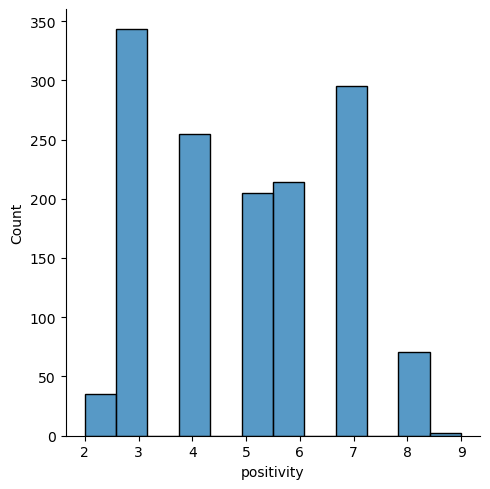

In [70]:
sns.displot(df.positivity)

(array([ 167.,  246.,  222.,  321.,  483., 1185., 1396., 1294., 1205.,
        1472.]),
 array([-6892. , -4559.3, -2226.6,   106.1,  2438.8,  4771.5,  7104.2,
         9436.9, 11769.6, 14102.3, 16435. ]),
 <BarContainer object of 10 artists>)

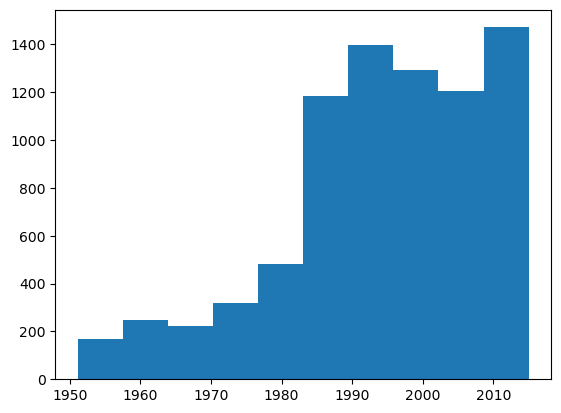

In [71]:
plt.hist(df.date)

In [72]:
relevance_df = df[df.relevance==1][['text', 'relevance', 'positivity']]
relevance_df 

,text,relevance,positivity
0,NEW YORK -- Yields on most certificates of dep...,1,3.0
4,NEW YORK -- Indecision marked the dollar's ton...,1,3.0
5,"Stocks declined, as investors weighed slower-t...",1,3.0
9,The U.S. dollar declined against most major fo...,1,4.0
12,Author: James B. Stewart</br></br>The dreaded ...,1,4.0
...,...,...,...
7973,Housing starts surged by 4.4 percent last mont...,1,7.0
7974,"When it comes to actually cashing in, stock ma...",1,3.0
7984,Perhaps nothing about the Clinton administrati...,1,8.0
7987,Looking at the enormous -- and incessant -- ti...,1,5.0


In [73]:
non_relevance_df = df[df.relevance==0][['text', 'relevance', 'positivity']]
non_relevance_df 

,text,relevance,positivity
1,The Wall Street Journal Online</br></br>The Mo...,0,NaN
2,WASHINGTON -- In an effort to achieve banking ...,0,NaN
3,The statistics on the enormous costs of employ...,0,NaN
6,TORONTO -- Royal Bank of Canada and Bank of Mo...,0,NaN
7,Many people think that the monster of health-c...,0,NaN
...,...,...,...
7994,NEW YORK. Oct. 7 (AIMâ€”Tile slock market adva...,0,NaN
7996,"U.S. stocks inched up last week, overcoming co...",0,NaN
7997,Ben S. Bernanke cleared a key hurdle Thursday ...,0,NaN
7998,The White House's push to contract out many fe...,0,NaN


Lets Identify Common Words in Headline and Text for News that are Relevant and Not-Relevant to the US Economy

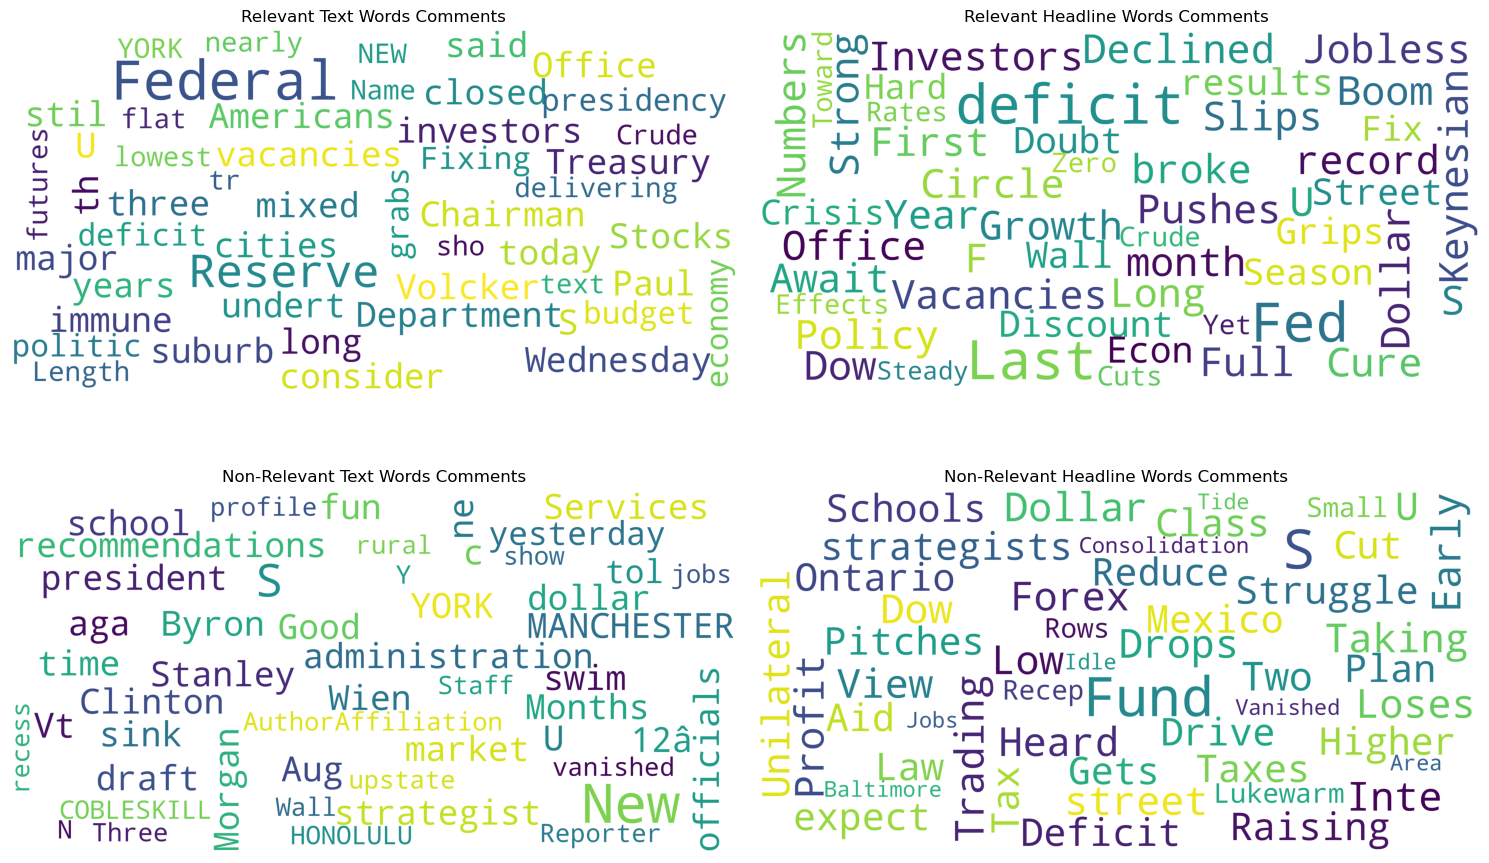

In [75]:
relevance_df = df[df.relevance==1][['text', 'headline', 'relevance', 'positivity']]
non_relevance_df = df[df.relevance==0][['text', 'headline', 'relevance', 'positivity']]

interest_feats = ['text', 'headline']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

sample_size = min(20000, len(relevance_df))
relevance_wordcloud1 = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=30, 
    scale=10,
    random_state=1
).generate(str(relevance_df[f'{interest_feats[0]}'].sample(sample_size, random_state=23)))

relevance_wordcloud2 = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=30, 
    scale=10,
    random_state=1
).generate(str(relevance_df[f'{interest_feats[1]}'].sample(sample_size, random_state=23)))

# Non-Relevance Workcloud data
sample_size = min(20000, len(relevance_df))
non_relevance_wordcloud1 = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=30, 
    scale=10,
    random_state=1
).generate(str(non_relevance_df[f'{interest_feats[0]}'].sample(sample_size, random_state=23)))

non_relevance_wordcloud2 = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=50,
    max_font_size=30, 
    scale=10,
    random_state=1
).generate(str(non_relevance_df[f'{interest_feats[1]}'].sample(sample_size, random_state=23)))

all_word_data = [relevance_wordcloud1, relevance_wordcloud2,
                 non_relevance_wordcloud1, non_relevance_wordcloud2]
all_word_title = ['Relevant Text Words', 'Relevant Headline Words',
                 'Non-Relevant Text Words', 'Non-Relevant Headline Words']

for i in range(4):
    axs[i].imshow(all_word_data[i])
    axs[i].set_title(f'{all_word_title[i]} Comments')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [76]:
non_relevance_df.head()

,text,headline,relevance,positivity
1,The Wall Street Journal Online</br></br>The Mo...,The Morning Brief: White House Seeks to Limit ...,0,NaN
2,WASHINGTON -- In an effort to achieve banking ...,Banking Bill Negotiators Set Compromise --- Pl...,0,NaN
3,The statistics on the enormous costs of employ...,Manager's Journal: Sniffing Out Drug Abusers I...,0,NaN
6,TORONTO -- Royal Bank of Canada and Bank of Mo...,"Bank of Montreal, Royal Bank Profits Rose in 2...",0,NaN
7,Many people think that the monster of health-c...,Battle Over Medical Costs Isn't Over,0,NaN


In [77]:
relevance_df.head()

,text,headline,relevance,positivity
0,NEW YORK -- Yields on most certificates of dep...,Yields on CDs Fell in the Latest Week,1,3.0
4,NEW YORK -- Indecision marked the dollar's ton...,Currency Trading: Dollar Remains in Tight Rang...,1,3.0
5,"Stocks declined, as investors weighed slower-t...","Stocks Fall Again; BofA, Alcoa Slide",1,3.0
9,The U.S. dollar declined against most major fo...,U.S. Dollar Falls Against Most Currencies; Dec...,1,4.0
12,Author: James B. Stewart</br></br>The dreaded ...,Defending Yourself Against Deflation,1,4.0


In [78]:
df.relevance.value_counts()

relevance
0    6571
1    1420
Name: count, dtype: int64

In [15]:
import spacy
import string
nlp = spacy.load('en_core_web_sm')

stopwords = ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("-", " ").replace("</br>", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

2025-01-15 22:27:29.972839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
df['clean_text'] = df.text.apply(clean)
df 

/var/folders/mn/89jgthfx1f7b2mlbmf36w11c0000gn/T/ipykernel_24083/1303545892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df.text.apply(clean)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text,clean_text
0,842613455,False,finalized,3,2015-12-05 17:48:00,3.0,0.6400,1,0.6400,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...,new york yields certificates deposit offered m...
1,842613456,False,finalized,3,2015-12-05 16:54:00,NaN,NaN,0,1.0000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...,wall street journal online br morning brief lo...
2,842613457,False,finalized,3,2015-12-05 01:59:00,NaN,NaN,0,1.0000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...,effort achieve banking reform negotiators admi...
3,842613458,False,finalized,3,2015-12-05 02:19:00,NaN,0.0000,0,0.6750,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...,statistics enormous costs employee drug abuse ...
4,842613459,False,finalized,3,2015-12-05 17:48:00,3.0,0.3257,1,0.6400,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...,new york indecision marked dollar s tone trade...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,830985632,False,finalized,3,2015-11-17 18:16:00,7.0,0.3511,1,0.6641,wapo_152454634,1952-02-11,"Sawyer Sees Strong Economy For 2 Years, Truce ...",NaN,NaN,Secretary of Commerce Charles W. Sawyer said y...,secretary commerce charles w sawyer said truce...
7996,830985633,False,finalized,3,2015-11-18 08:10:00,NaN,NaN,0,1.0000,wapo_410349039,2009-12-13,Oil's losses are airlines' gains,NaN,NaN,"U.S. stocks inched up last week, overcoming co...",stocks inched week overcoming concern credit l...
7997,830985634,False,finalized,3,2015-11-18 12:12:00,NaN,NaN,0,1.0000,wapo_410346237,2009-12-18,Full Senate to vote on Bernanke; PANEL ADVANCE...,NaN,NaN,Ben S. Bernanke cleared a key hurdle Thursday ...,ben s cleared key hurdle confirmed term federa...
7998,830985635,False,finalized,3,2015-11-18 07:17:00,NaN,0.0000,0,0.6855,wapo_307808606,1995-01-10,Reinventing Opportunities,NaN,NaN,The White House's push to contract out many fe...,white house s push contract federal functions ...


To build a Classification Model that can predict the whether the News is relevant to US Economy, we'll use a MiniLM model to generate semantic embeddings from textual data which enables applying classification models.

We will test Random Forest, XGBoost and TensorFlow Neural Network Models.

In [6]:
from sentence_transformers import SentenceTransformer

mini_lm_name = 'all-MiniLM-L6-v2'
encoder = SentenceTransformer(model_name_or_path=mini_lm_name)

df["st_text"] = df["text"].str.replace("-", " ").replace("</br>", " ") 
df["st_text"] = df["st_text"].apply(encoder.encode)

df["st_headline"] = df["headline"].str.replace("-", " ").replace("</br>", " ").replace(":", " ").replace("  ", " ") 
df["st_headline"] = df["st_headline"].apply(encoder.encode)

df.head() 

/Users/aakashrathod/opt/anaconda3/envs/pyenv/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2025-01-23 19:27:52.768823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/aakashrathod/opt/anaconda3/envs/pyenv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text,st_text,st_headline
0,842613455,False,finalized,3,2015-12-05 17:48:00,3.0,0.6400,1,0.640,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...,"[0.05053975, -0.04293389, -0.033743538, 0.0279...","[0.025305908, 0.01129203, -0.01226584, 0.04064..."
1,842613456,False,finalized,3,2015-12-05 16:54:00,NaN,NaN,0,1.000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...,"[-0.055869695, 0.039299913, -0.0010006003, 0.0...","[-0.05477697, 0.12584607, 0.05113708, 0.026366..."
2,842613457,False,finalized,3,2015-12-05 01:59:00,NaN,NaN,0,1.000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...,"[0.04906608, -0.03146126, -0.034393232, -0.018...","[0.050758876, -0.011712888, -0.010045056, -0.0..."
3,842613458,False,finalized,3,2015-12-05 02:19:00,NaN,0.0000,0,0.675,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...,"[0.0029198593, 0.054706525, 0.043262314, -0.01...","[0.036204882, 0.066353, 0.009017552, 0.0041213..."
4,842613459,False,finalized,3,2015-12-05 17:48:00,3.0,0.3257,1,0.640,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...,"[0.0135736605, -0.01663629, -0.0019379555, 0.0...","[-0.024388555, -0.031337917, -0.061131403, 0.0..."


In [38]:
df['st_headline_text'] = df.apply(lambda row: row['st_headline'].tolist() + row['st_text'].tolist(), axis=1)
df 

/var/folders/mn/89jgthfx1f7b2mlbmf36w11c0000gn/T/ipykernel_33723/4053535647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st_headline_text'] = df.apply(lambda row: row['st_headline'].tolist() + row['st_text'].tolist(), axis=1)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text,st_text,st_headline,st_headline_text
0,842613455,False,finalized,3,2015-12-05 17:48:00,3.0,0.6400,1,0.6400,wsj_398217788,1991-08-14,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...,"[0.05053975, -0.04293389, -0.033743538, 0.0279...","[0.025305908, 0.01129203, -0.01226584, 0.04064...","[0.025305908173322678, 0.011292030103504658, -..."
1,842613456,False,finalized,3,2015-12-05 16:54:00,NaN,NaN,0,1.0000,wsj_399019502,2007-08-21,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...,"[-0.055869695, 0.039299913, -0.0010006003, 0.0...","[-0.05477697, 0.12584607, 0.05113708, 0.026366...","[-0.05477697029709816, 0.12584607303142548, 0...."
2,842613457,False,finalized,3,2015-12-05 01:59:00,NaN,NaN,0,1.0000,wsj_398284048,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...,"[0.04906608, -0.03146126, -0.034393232, -0.018...","[0.050758876, -0.011712888, -0.010045056, -0.0...","[0.05075887590646744, -0.01171288825571537, -0..."
3,842613458,False,finalized,3,2015-12-05 02:19:00,NaN,0.0000,0,0.6750,wsj_397959018,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...,"[0.0029198593, 0.054706525, 0.043262314, -0.01...","[0.036204882, 0.066353, 0.009017552, 0.0041213...","[0.036204881966114044, 0.06635300070047379, 0...."
4,842613459,False,finalized,3,2015-12-05 17:48:00,3.0,0.3257,1,0.6400,wsj_398838054,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...,"[0.0135736605, -0.01663629, -0.0019379555, 0.0...","[-0.024388555, -0.031337917, -0.061131403, 0.0...","[-0.02438855543732643, -0.0313379168510437, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,830985632,False,finalized,3,2015-11-17 18:16:00,7.0,0.3511,1,0.6641,wapo_152454634,1952-02-11,"Sawyer Sees Strong Economy For 2 Years, Truce ...",NaN,NaN,Secretary of Commerce Charles W. Sawyer said y...,"[-0.07907036, 0.02022521, 0.06280593, -0.01755...","[-0.02562902, -0.04492156, 0.030256953, -0.010...","[-0.025629019364714622, -0.04492155835032463, ..."
7996,830985633,False,finalized,3,2015-11-18 08:10:00,NaN,NaN,0,1.0000,wapo_410349039,2009-12-13,Oil's losses are airlines' gains,NaN,NaN,"U.S. stocks inched up last week, overcoming co...","[-0.051426392, -0.07229938, 0.017076815, 0.132...","[0.039053354, -0.007323077, 0.06740572, 0.0767...","[0.039053354412317276, -0.007323076948523521, ..."
7997,830985634,False,finalized,3,2015-11-18 12:12:00,NaN,NaN,0,1.0000,wapo_410346237,2009-12-18,Full Senate to vote on Bernanke; PANEL ADVANCE...,NaN,NaN,Ben S. Bernanke cleared a key hurdle Thursday ...,"[0.039496105, -0.06084682, 0.0062035383, 0.044...","[0.016846826, -0.08018229, 0.019593423, 0.0048...","[0.016846826300024986, -0.08018229156732559, 0..."
7998,830985635,False,finalized,3,2015-11-18 07:17:00,NaN,0.0000,0,0.6855,wapo_307808606,1995-01-10,Reinventing Opportunities,NaN,NaN,The White House's push to contract out many fe...,"[-0.01954184, -0.06471222, 0.04385203, 0.04694...","[-0.024653116, -0.052232113, 0.024466788, -9.9...","[-0.02465311624109745, -0.05223211273550987, 0..."


In [39]:
from sklearn.model_selection import train_test_split

X = np.vstack(df["st_text"])  
y = df["relevance"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced', max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.7173233270794246
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1302
           1       0.36      0.64      0.46       297

    accuracy                           0.72      1599
   macro avg       0.63      0.69      0.63      1599
weighted avg       0.80      0.72      0.74      1599

[[957 345]
 [107 190]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

Class Weights: {0: 0.6065667109508446, 1: 2.845948352626892}
Epoch 1/10
160/160 [==============================] - 1s 3ms/step - loss: 0.6150 - accuracy: 0.6356 - val_loss: 0.5382 - val_accuracy: 0.6841
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.6708 - val_loss: 0.5949 - val_accuracy: 0.6427
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.6925 - val_loss: 0.5910 - val_accuracy: 0.6544
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7146 - val_loss: 0.6278 - val_accuracy: 0.6388
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7401 - val_loss: 0.6407 - val_accuracy: 0.6357
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.7784 - val_loss: 0.5944 - val_accuracy: 0.6919
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 0.3421 - accu

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'max_depth': [3, 5, 7],            
    'learning_rate': [0.01, 0.005],   
    'n_estimators': [200, 300],       
    'subsample': [0.8, 1.0],          
    'colsample_bytree': [0.6, 0.8],  
    'scale_pos_weight': [4.5]        
}

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='f1',              
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nF1 Score:\n", f1_score(y_test, y_pred, average='weighted')) 

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 4.5, 'subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1302
           1       0.36      0.63      0.46       297

    accuracy                           0.73      1599
   macro avg       0.63      0.69      0.64      1599
weighted avg       0.80      0.73      0.75      1599


Confusion Matrix:
 [[975 327]
 [111 186]]

F1 Score:
 0.7502132300024199


Comparing Performance of All three Models: RandomForest, NeuralNetwork and XGBoost 

Have performed grid search for hyperparameter tuning- RF and XGB have very similar performances.

Now lets see if we can further improvde the performance of the model. We will use both embedding feature, one from Headline as well as Text and concat them, then applying XGBoost to check if it further improves the performance of the model.

XGBoost Model with Combined Headline & Text Embeddings 

In [40]:
from sklearn.model_selection import train_test_split

X = np.vstack(df["st_headline_text"])  
y = df["relevance"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'max_depth': [5, 7],            
    'learning_rate': [0.01, 0.005],   
    'n_estimators': [200, 300],       
    'subsample': [1.0],          
    'colsample_bytree': [0.6, 0.8],  
    'scale_pos_weight': [4.5]        
}

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='f1',              
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nF1 Score:\n", f1_score(y_test, y_pred, average='weighted')) 

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 4.5, 'subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1302
           1       0.38      0.66      0.48       297

    accuracy                           0.74      1599
   macro avg       0.64      0.71      0.65      1599
weighted avg       0.81      0.74      0.76      1599


Confusion Matrix:
 [[980 322]
 [101 196]]

F1 Score:
 0.7590600201783624


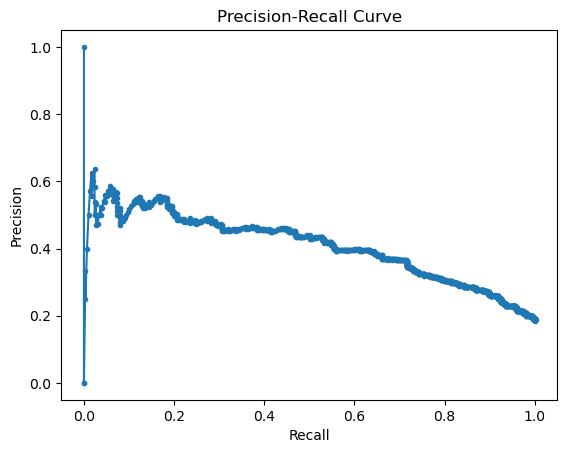

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = best_model.predict_proba(X_test)[:, 1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
d1 = {
    'thresholds': list(thresholds) + [1],
    'precision': precision,
    'recall': recall
}
roc_df = pd.DataFrame(d1)
roc_df.to_excel('News Prediction XGB ROC Metrics.xlsx')
roc_df 

,thresholds,precision,recall
0,0.159596,0.185741,1.000000
1,0.160416,0.185857,1.000000
2,0.161911,0.185974,1.000000
3,0.162580,0.186090,1.000000
4,0.163596,0.186207,1.000000
...,...,...,...
1595,0.703982,0.250000,0.003367
1596,0.707535,0.333333,0.003367
1597,0.722332,0.000000,0.000000
1598,0.730808,0.000000,0.000000


When we concat the headline and text feature vectors generated using MiniLM and use XGBoost model, it gives us promising results.

We get 38% Precision and 66% Recall at 50% probability threshold, which is great improvement over the previous models.

# The END